## Week 3 Lab

***

## Project Description

In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("nc.csv")

In [3]:
df

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,47.0,42,mature mom,40.0,full term,10.0,not married,26.0,8.44,not low,male,nonsmoker,not white
996,34.0,42,mature mom,38.0,full term,18.0,not married,20.0,6.19,not low,female,nonsmoker,white
997,39.0,45,mature mom,40.0,full term,15.0,not married,32.0,6.94,not low,female,nonsmoker,white
998,55.0,46,mature mom,31.0,premie,8.0,not married,25.0,4.56,low,female,nonsmoker,not white


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            829 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           998 non-null    float64
 4   premie          998 non-null    object 
 5   visits          991 non-null    float64
 6   marital         999 non-null    object 
 7   gained          973 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  gender          1000 non-null   object 
 11  habit           999 non-null    object 
 12  whitemom        998 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


In [5]:
df.describe(include='all')

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
count,829.000000,1000.000000,1000,998.000000,998,991.000000,999,973.000000,1000.00000,1000,1000,999,998
unique,NaN,NaN,2,NaN,2,NaN,2,NaN,NaN,2,2,2,2
top,NaN,NaN,younger mom,NaN,full term,NaN,not married,NaN,NaN,not low,female,nonsmoker,white
freq,NaN,NaN,867,NaN,846,NaN,613,NaN,NaN,889,503,873,714
mean,30.255730,27.000000,NaN,38.334669,NaN,12.104945,NaN,30.325797,7.10100,NaN,NaN,NaN,NaN
std,6.763766,6.213583,NaN,2.931553,NaN,3.954934,NaN,14.241297,1.50886,NaN,NaN,NaN,NaN
min,14.000000,13.000000,NaN,20.000000,NaN,0.000000,NaN,0.000000,1.00000,NaN,NaN,NaN,NaN
25%,25.000000,22.000000,NaN,37.000000,NaN,10.000000,NaN,20.000000,6.38000,NaN,NaN,NaN,NaN
50%,30.000000,27.000000,NaN,39.000000,NaN,12.000000,NaN,30.000000,7.31000,NaN,NaN,NaN,NaN
75%,35.000000,32.000000,NaN,40.000000,NaN,15.000000,NaN,38.000000,8.06000,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['fage', 'mage', 'mature', 'weeks', 'premie', 'visits', 'marital', 'gained', 'weight', 'lowbirthweight', 'gender', 'habit', 'whitemom'], dtype='object')

How many of the 13 variables are categorical?

7

Use a visualization such as a histogram and summary statistics tools in R to analyze the distribution of weight. Which of the following best describes the distribution of weight?

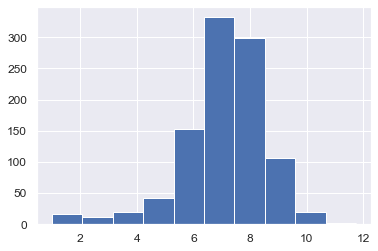

In [7]:
df["weight"].hist()
plt.show()

Left skewed

In [8]:
df["premie"].value_counts()

full term    846
premie       152
Name: premie, dtype: int64

In [9]:
fullterm = df[df["premie"] == "full term"]

In [10]:
fullterm 

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,34.0,41,mature mom,39.0,full term,15.0,not married,40.0,6.56,not low,male,nonsmoker,not white
995,47.0,42,mature mom,40.0,full term,10.0,not married,26.0,8.44,not low,male,nonsmoker,not white
996,34.0,42,mature mom,38.0,full term,18.0,not married,20.0,6.19,not low,female,nonsmoker,white
997,39.0,45,mature mom,40.0,full term,15.0,not married,32.0,6.94,not low,female,nonsmoker,white


Which of the following corresponds to the 95% credible interval for the average birth weight of all full-term babies born in North Carolina?

There is a 95% chance that the average weights of babies in this sample is between 7.4 an 7.5 pounds

Based of Jeffrey’s scale for interpretation of a Bayes factors how should we describe the evidence against H1 from your results for the hypothesis test?

For predicting the birth weight of a new full term baby in NC

Construct a side-by-side boxplot of habit and weight for the data using full term births and compare the two distributions

<Figure size 2880x1440 with 0 Axes>

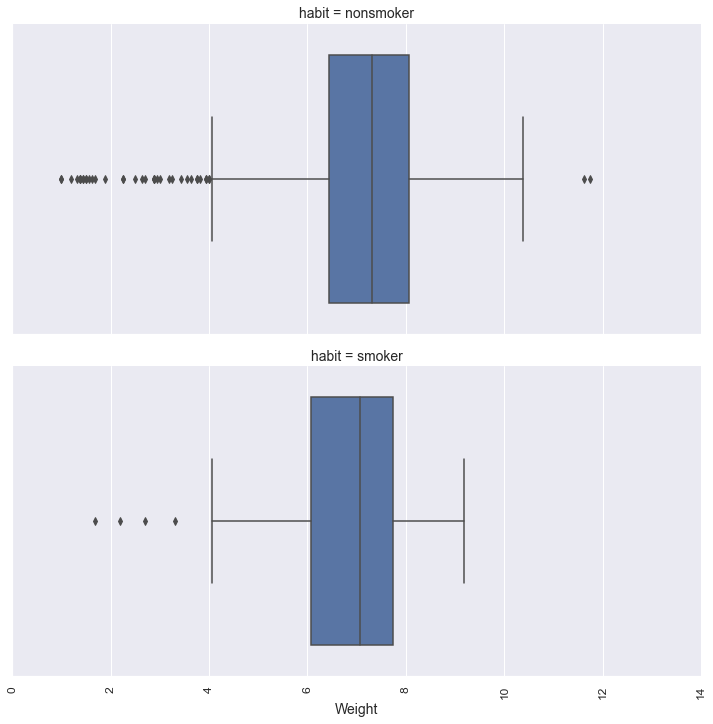

In [11]:
plt.figure(figsize=(40,20))


g = sns.catplot(x='weight',  row = 'habit',
            kind='box', data=df,
            height = 5, aspect = 2)

g.set_xlabels("Weight")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)



plt.show()

Which of the following is false about the relationship between habit and weight?

The IQRs of the distributions are roughly equal

Based on the Bayes factor calculated above, how strong is evidence against H1?

How would the Bayes factor above change if we were to increase the prior probability of H2 to 0.75?

How would the Bayes factor for H2 to H1 change if we were to change the scale in the Cauchy prior rscale = sqrt(2)/2?

Based on the 95% credible interval for the differences in full term birth weights for nonsmokers and smoker:

Conduct the same hypothesis test for the mean of the difference in perceived stress scale for the sport group. Based of Jeffrey’s scale for interpretation of a Bayes factors how should we describe the evidence against H1 from the results?

#### Python code done by Dennis Lam